# Census income classification with LightGBM

This notebook demonstrates how to use LightGBM to predict the probability of an individual making over $50K a year in annual income. It uses the standard UCI Adult income dataset. To download a copy of this notebook visit [github](https://github.com/slundberg/shap/tree/master/notebooks).

Gradient boosting machine methods such as LightGBM are state-of-the-art for these types of prediction problems with tabular style input data of many modalities. Tree SHAP ([paper](https://arxiv.org/abs/1706.06060)) allows for the exact computation of SHAP values for tree ensemble methods, and has been integrated directly into the C++ LightGBM code base. This allows fast exact computation of SHAP values without sampling and without providing a background dataset (since the background is inferred from the coverage of the trees).

Here we demonstrate how to use SHAP values to understand LightGBM model predictions. 

In [1]:
#import pandas as pd
from sklearn.model_selection import train_test_split
#import numpy as np
import lightgbm as lgb
import shap

# print the JS visualization code to the notebook
shap.initjs()

## Load dataset

In [3]:
X,y,X_display = shap.datasets.adult()

# create a train/test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=7)
d_train = lgb.Dataset(X_train, label=y_train)
d_test = lgb.Dataset(X_test, label=y_test)

## Train the model

In [5]:
params = {
    "max_bin": 512,
    "learning_rate": 0.05,
    "boosting_type": "gbdt",
    "objective": "binary",
    "metric": "binary_logloss",
    "num_leaves": 10,
    "verbose": -1,
    "min_data": 100,
    "boost_from_average": True
}

model = lgb.train(params, d_train, 10000, valid_sets=[d_test], early_stopping_rounds=50, verbose_eval=1000)

Training until validation scores don't improve for 50 rounds.
Early stopping, best iteration is:
[573]	valid_0's binary_logloss: 0.278554


## Explain predictions

Here we use the Tree SHAP implementation integrated into Light GBM to explain the entire dataset (32561 samples).

In [8]:
shap_values = model.predict(X.as_matrix(), pred_contrib=True)

### Visualize a single prediction

Note that we use the "display values" data frame so we get nice strings instead of category codes. 

In [14]:
shap.visualize(shap_values[0,:], features=X_display.iloc[0,:])

### Visualize many predictions

To keep the browser happy we only visualize 1,000 individuals.

In [15]:
shap.visualize(shap_values[:1000,:], features=X_display.iloc[:1000,:])

[<iml.explanations.AdditiveExplanation at 0x1a159699e8>,
 <iml.explanations.AdditiveExplanation at 0x1a159692e8>,
 <iml.explanations.AdditiveExplanation at 0x1a15969b00>,
 <iml.explanations.AdditiveExplanation at 0x1a15969be0>,
 <iml.explanations.AdditiveExplanation at 0x1a15969c18>,
 <iml.explanations.AdditiveExplanation at 0x1a15969c50>,
 <iml.explanations.AdditiveExplanation at 0x1a15969d30>,
 <iml.explanations.AdditiveExplanation at 0x1a15969e10>,
 <iml.explanations.AdditiveExplanation at 0x1a15969ef0>,
 <iml.explanations.AdditiveExplanation at 0x1a15969fd0>,
 <iml.explanations.AdditiveExplanation at 0x1a158eb0f0>,
 <iml.explanations.AdditiveExplanation at 0x1a158eb1d0>,
 <iml.explanations.AdditiveExplanation at 0x1a158eb2b0>,
 <iml.explanations.AdditiveExplanation at 0x1a158eb390>,
 <iml.explanations.AdditiveExplanation at 0x1a158eb470>,
 <iml.explanations.AdditiveExplanation at 0x1a158eb550>,
 <iml.explanations.AdditiveExplanation at 0x1a158eb630>,
 <iml.explanations.AdditiveExplanation at 0x1a158eb710>,
 <iml.explanations.AdditiveExplanation at 0x1a158eb7f0>,
 <iml.explanations.AdditiveExplanation at 0x1a158eb8d0>,
 <iml.explanations.AdditiveExplanation at 0x1a158eb9b0>,
 <iml.explanations.AdditiveExplanation at 0x1a158eba90>,
 <iml.explanations.AdditiveExplanation at 0x1a158ebb70>,
 <iml.explanations.AdditiveExplanation at 0x1a158ebc50>,
 <iml.explanations.AdditiveExplanation at 0x1a158ebd30>,
 <iml.explanations.AdditiveExplanation at 0x1a158ebe10>,
 <iml.explanations.AdditiveExplanation at 0x1a158ebef0>,
 <iml.explanations.AdditiveExplanation at 0x1a158ebfd0>,
 <iml.explanations.AdditiveExplanation at 0x1a158f30f0>,
 <iml.explanations.AdditiveExplanation at 0x1a15d60e48>,
 <iml.explanations.AdditiveExplanation at 0x1a135c3fd0>,
 <iml.explanations.AdditiveExplanation at 0x1a15d700b8>,
 <iml.explanations.AdditiveExplanation at 0x1a12cf7128>,
 <iml.explanations.AdditiveExplanation at 0x1a12cf7b70>,
 <iml.explanations.AdditiveExplanation at 0x1a12cf7978>,
 <iml.explanations.AdditiveExplanation at 0x1a12cf78d0>,
 <iml.explanations.AdditiveExplanation at 0x1a12cf7898>,
 <iml.explanations.AdditiveExplanation at 0x1a158f3208>,
 <iml.explanations.AdditiveExplanation at 0x1a158f32e8>,
 <iml.explanations.AdditiveExplanation at 0x1a158f33c8>,
 <iml.explanations.AdditiveExplanation at 0x1a158f34a8>,
 <iml.explanations.AdditiveExplanation at 0x1a158f3588>,
 <iml.explanations.AdditiveExplanation at 0x1a158f3668>,
 <iml.explanations.AdditiveExplanation at 0x1a158f3748>,
 <iml.explanations.AdditiveExplanation at 0x1a158f3828>,
 <iml.explanations.AdditiveExplanation at 0x1a158f3908>,
 <iml.explanations.AdditiveExplanation at 0x1a158f39e8>,
 <iml.explanations.AdditiveExplanation at 0x1a158f3ac8>,
 <iml.explanations.AdditiveExplanation at 0x1a158f3ba8>,
 <iml.explanations.AdditiveExplanation at 0x1a158f3c88>,
 <iml.explanations.AdditiveExplanation at 0x1a158f3d68>,
 <iml.explanations.AdditiveExplanation at 0x1a158f3e48>,
 <iml.explanations.AdditiveExplanation at 0x1a158f3f28>,
 <iml.explanations.AdditiveExplanation at 0x1a158fe048>,
 <iml.explanations.AdditiveExplanation at 0x1a158fe128>,
 <iml.explanations.AdditiveExplanation at 0x1a158fe208>,
 <iml.explanations.AdditiveExplanation at 0x1a158fe2e8>,
 <iml.explanations.AdditiveExplanation at 0x1a158fe3c8>,
 <iml.explanations.AdditiveExplanation at 0x1a158fe4a8>,
 <iml.explanations.AdditiveExplanation at 0x1a158fe588>,
 <iml.explanations.AdditiveExplanation at 0x1a158fe668>,
 <iml.explanations.AdditiveExplanation at 0x1a158fe748>,
 <iml.explanations.AdditiveExplanation at 0x1a158fe828>,
 <iml.explanations.AdditiveExplanation at 0x1a158fe908>,
 <iml.explanations.AdditiveExplanation at 0x1a158fe9e8>,
 <iml.explanations.AdditiveExplanation at 0x1a158feac8>,
 <iml.explanations.AdditiveExplanation at 0x1a158feba8>,
 <iml.explanations.AdditiveExplanation at 0x1a158fec88>,
 <iml.explanations.AdditiveExplanation at 0x1a158fed68>,
 <iml.explanations.AdditiveExplanation at 0x1a158fee48>,
 <iml.expl

## SHAP Summary Plot

Rather than use a typical feature importance bar chart, we use a density scatter plot of SHAP values for each feature to identify how much impact each feature has on the model output for individuals in the validation dataset. Features are sorted by the sum of the SHAP value magnitudes across all samples. It is interesting to note that the relationship feature has more total model impact than the captial gain feature, but for those samples where capital gain matters it has more impact than age. In other words, capital gain effects a few predictions by a large amount, while age effects all predictions by a smaller amount.

Note that when the scatter points don't fit on a line they pile up to show density, and the color of each point represents the feature value of that individual.

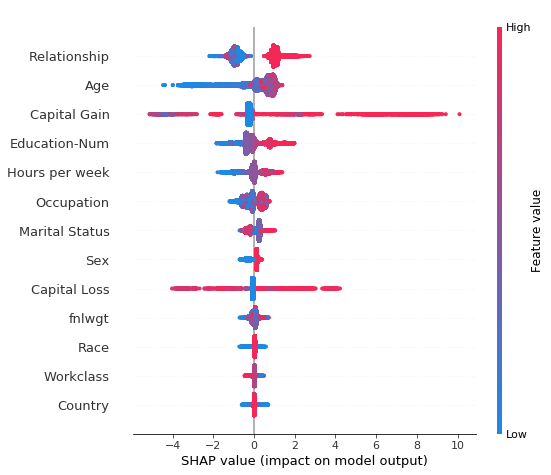

In [16]:
shap.summary_plot(shap_values, X)

## SHAP Dependence Plots

SHAP dependence plots show the effect of a single feature across the whole dataset. They plot a feature's value vs. the SHAP value of that feature across many samples. SHAP dependence plots are similar to partial dependence plots, but account for the interaction effects present in the features, and are only defined in regions of the input space supported by data. The vertical dispersion of SHAP values at a single feature value is driven by interaction effects, and another feature is chosen for coloring to highlight possible interactions.

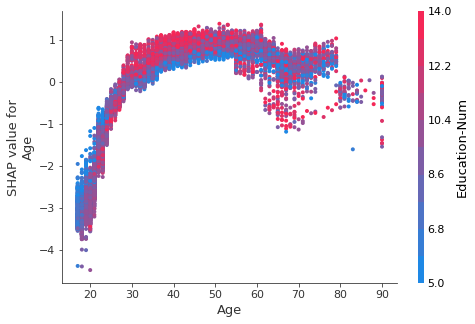

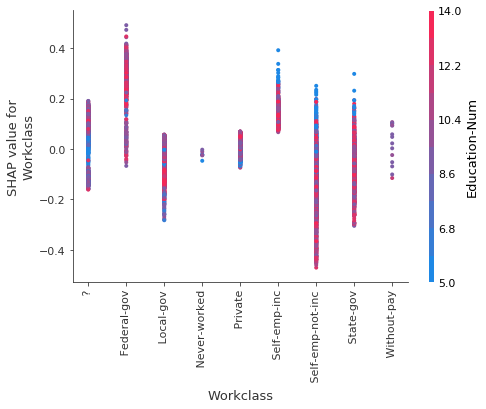

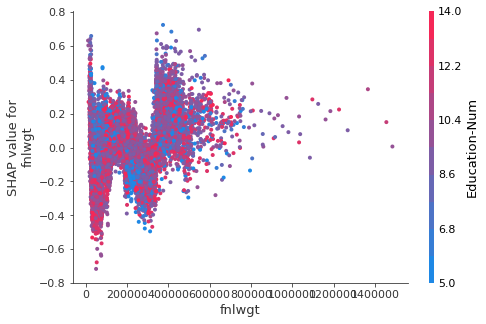

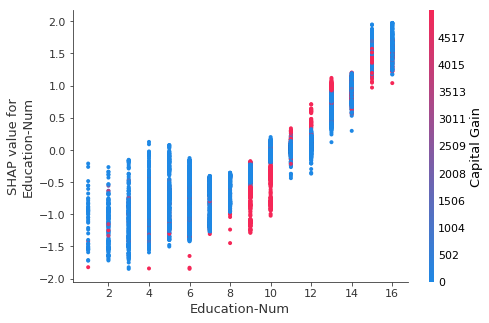

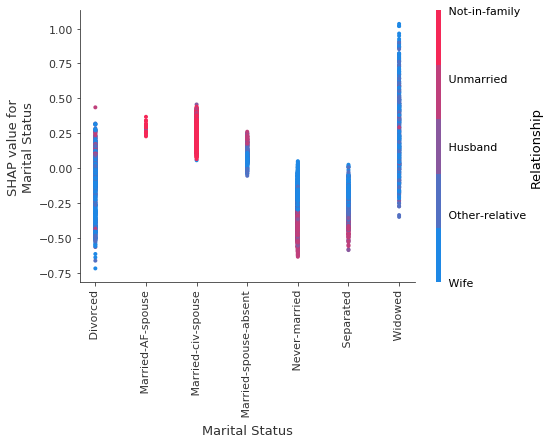

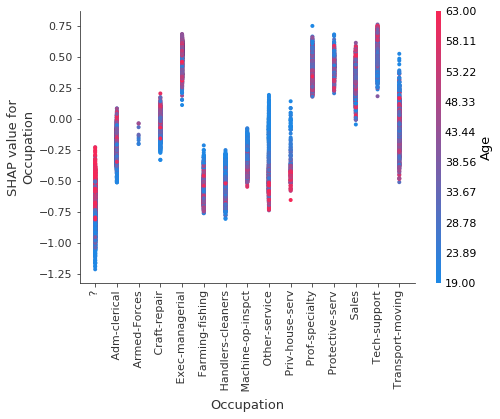

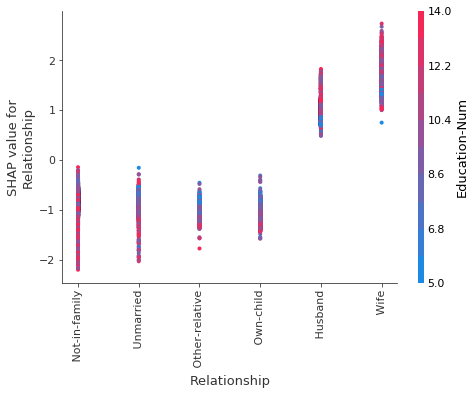

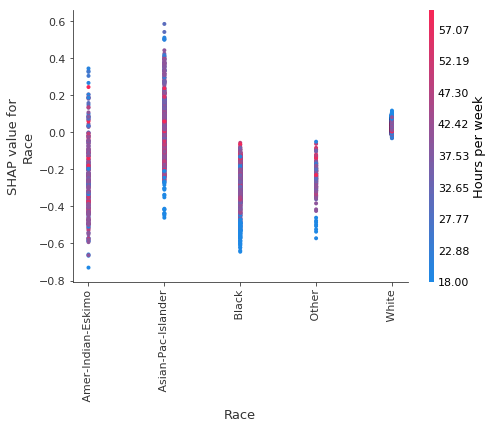

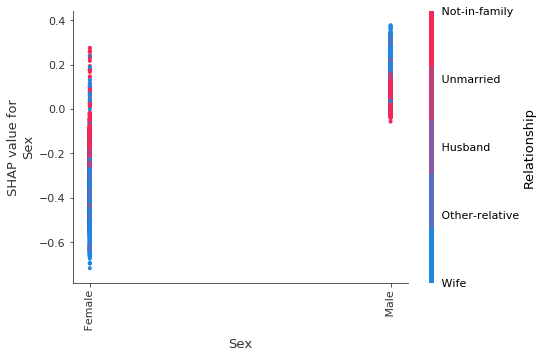

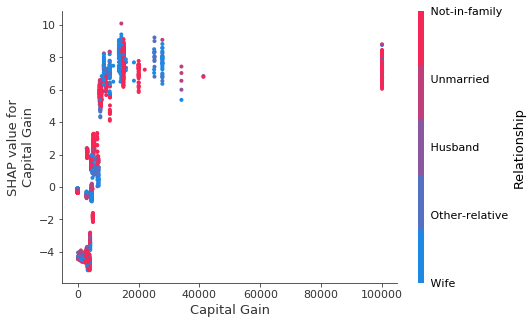

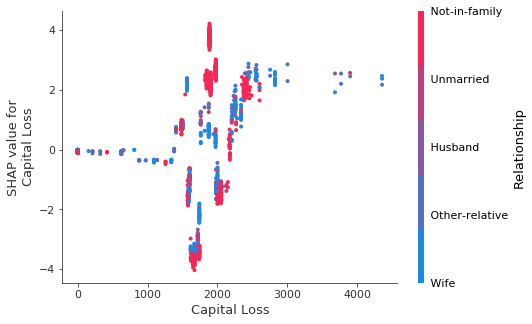

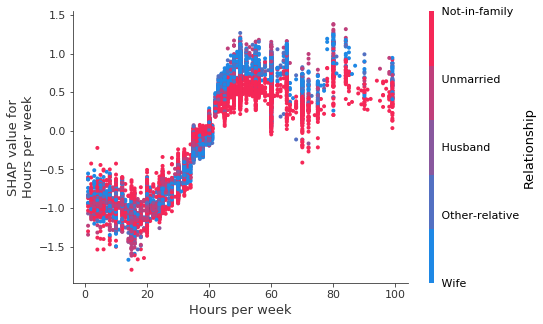

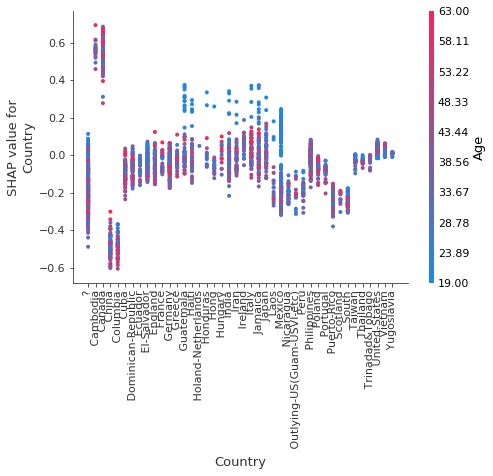

In [18]:
for name in X_train.columns:
    shap.dependence_plot(name, shap_values, X, display_features=X_display)

### Train a model with only two leaves per tree and hence no interaction terms between features

Forcing the model to have no interaction terms means the effect of a feature on the outcome does not depend on the value of any other feature. This is reflected in the SHAP dependence plots below as no vertical spread. A vertical spread reflects that a single value of a feature can have different effects on the model output depending on the context of the other features present for an individual. However, for models without interaction terms, a feature always has the same impact regardless of what other attributes an individual may have.

One the benefits of SHAP dependence plots over traditional partial dependence plots is this ability to distigush between between models with and without interaction terms. In other words, SHAP plots give an idea of the magnitude of the interaction terms through the vertical variance of the scatter plot at a given feature value.

In [20]:
params = {
    "max_bin": 512,
    "learning_rate": 0.1,
    "boosting_type": "gbdt",
    "objective": "binary",
    "metric": "binary_logloss",
    "num_leaves": 2,
    "verbose": -1,
    "min_data": 100,
    "boost_from_average": True
}

model_ind = lgb.train(params, d_train, 20000, valid_sets=[d_test], early_stopping_rounds=50, verbose_eval=1000)

Training until validation scores don't improve for 50 rounds.
[1000]	valid_0's binary_logloss: 0.296136
[2000]	valid_0's binary_logloss: 0.290088
[3000]	valid_0's binary_logloss: 0.28741
[4000]	valid_0's binary_logloss: 0.28534
Early stopping, best iteration is:
[4509]	valid_0's binary_logloss: 0.284541


In [21]:
shap_values_ind = model_ind.predict(X, pred_contrib=True)

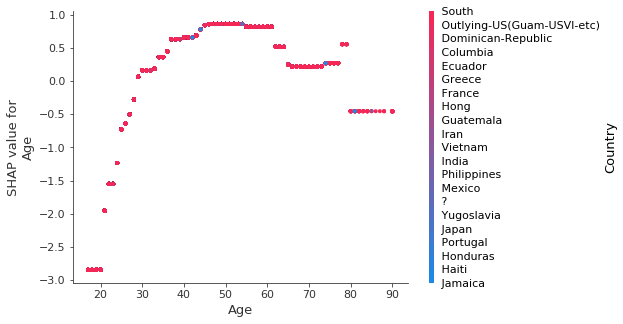

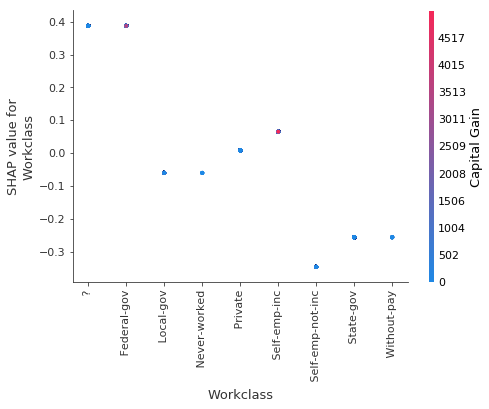

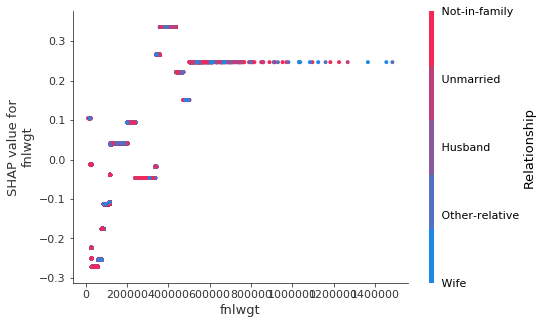

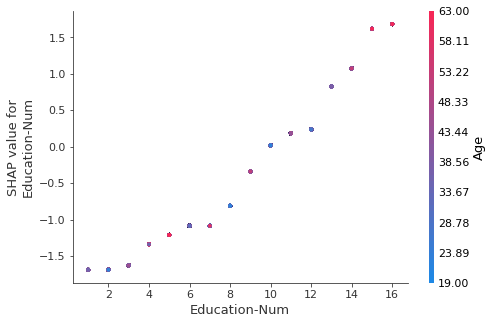

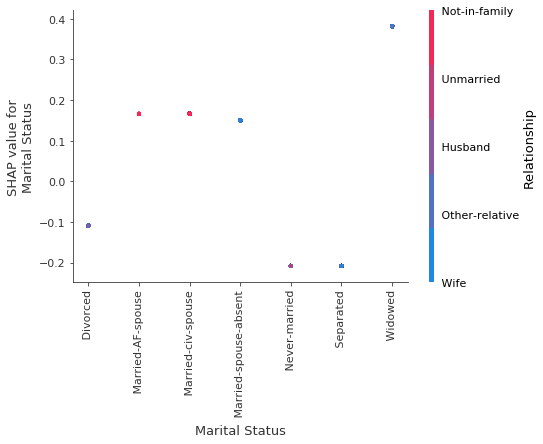

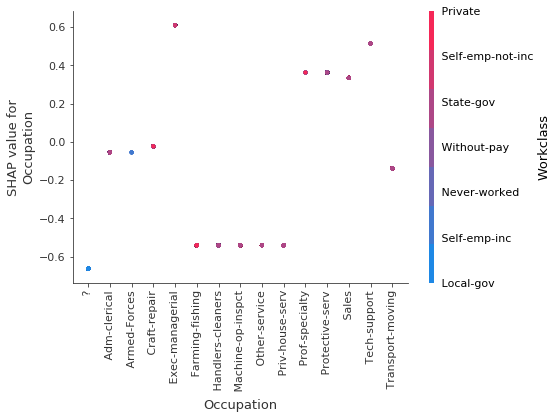

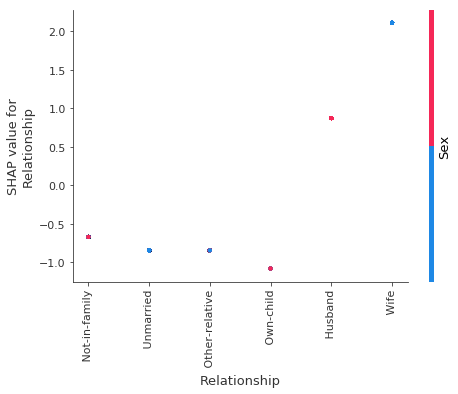

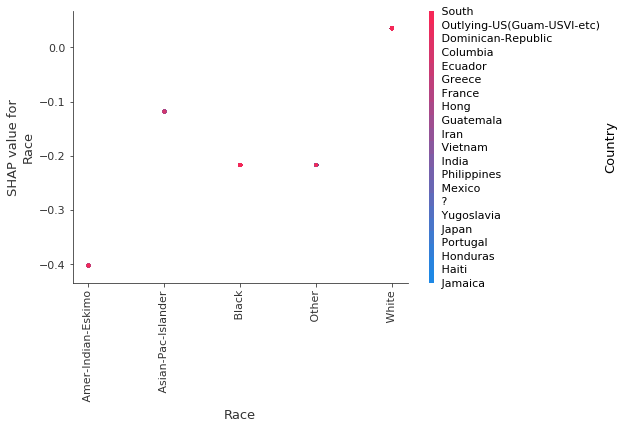

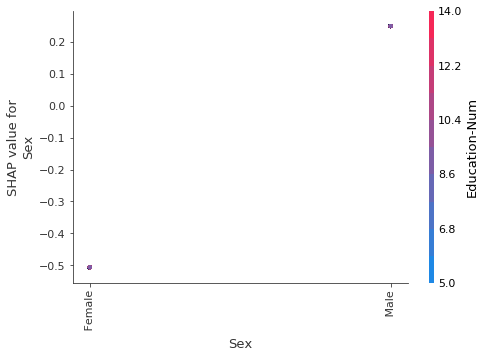

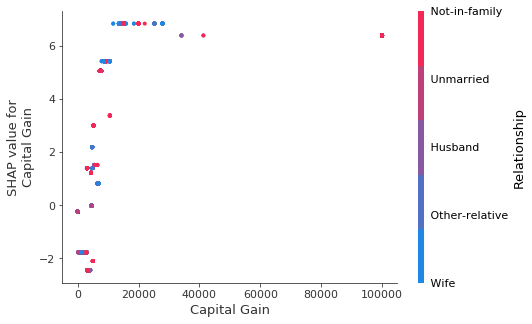

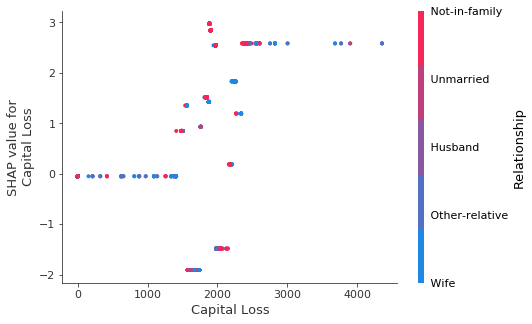

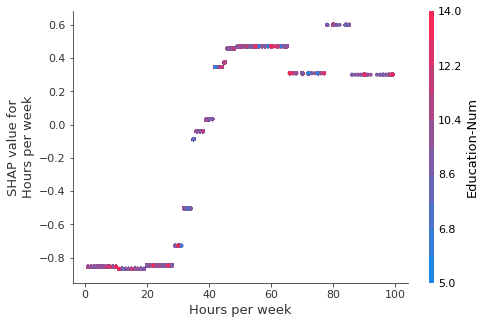

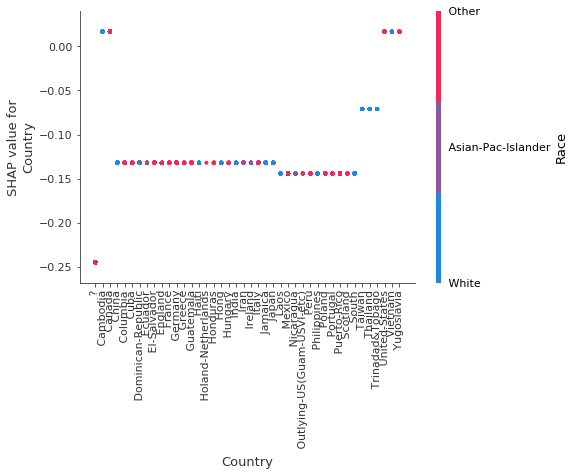

In [22]:
for name in X_train.columns:
    shap.dependence_plot(name, shap_values_ind, X, display_features=X_display)